In [12]:
from mpl_toolkits.basemap import Basemap, shiftgrid, cm
#cm(colormap)庫提供一系列彩色地圖
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset

# 讀入 etopo5 地形/降水量
etopodata = Dataset('HWData/etopo5.cdf')
print(etopodata.variables.keys())

dict_keys(['ETOPO05_X', 'ETOPO05_Y', 'ROSE'])


In [11]:
lons = etopodata.variables['ETOPO05_X'][:]
lats = etopodata.variables['ETOPO05_Y'][:]
topoin = etopodata.variables['ROSE'][:]

topoin,lons = shiftgrid(180.,topoin,lons,start=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


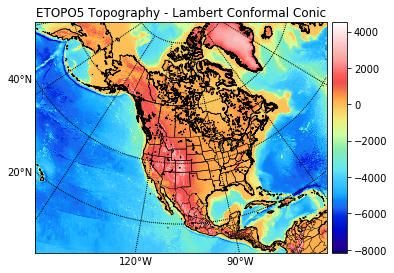

In [19]:
#彙製地圖
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,0.8,0.8])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=100.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

# 轉換為 nx x ny 定期分空 5km 本機投影網格
nx = int((m.xmax-m.xmin)/5000.)+1; ny = int((m.ymax-m.ymin)/5000.)+1
topodat = m.transform_scalar(topoin,lons,lats,nx,ny)

#劃定海岸線和邊境界限
m.drawcoastlines()
m.drawstates()
m.drawcountries()

# 繪製經緯線
#以20度為間隔畫出0度到北緯80度緯線， 並且在圖像左側設置緯線標籤
parallels = np.arange(0.,80,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)

#以30度為間隔畫出經線， 並且在圖像下側設置經線標籤
meridians = np.arange(0,360.,30.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

im = m.imshow(topodat,cm.GMT_haxby)

# 加入 colorbar
cb = m.colorbar(im,"right", size="5%", pad='2%')
ax.set_title('ETOPO5 Topography - Lambert Conformal Conic')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


plot native cylindrical map (no warping needed) ...


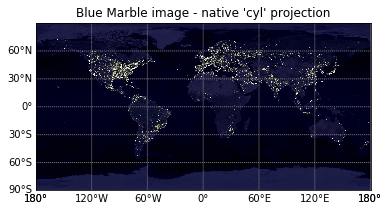

In [18]:
from __future__ import (absolute_import, division, print_function)
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

fig=plt.figure()
m = Basemap(projection='cyl',llcrnrlon=-180,llcrnrlat=-90,urcrnrlon=180,urcrnrlat=90,resolution='c')
im = m.bluemarble(scale=0.5)
m.warpimage(image='HWData/earth_lights_lrg.jpg')

# 繪製經緯度網格
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1],color='0.5')
m.drawparallels(np.arange(-90,90, 30),labels =[1,0,0,0], color = '0.5')

# 輸出圖像標題
plt.title("Blue Marble image - native 'cyl' projection",fontsize=12)
print('plot native cylindrical map (no warping needed) ...')

plt.show()